<a href="https://colab.research.google.com/github/akshayiitr04/satellite-property-valuation/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
BASE = "/content/drive/MyDrive/satellite_project"

In [7]:
folders = [
    "data/raw",
    "data/processed",
    "images/raw",
    "images/processed"
]

for f in folders:
    os.makedirs(os.path.join(BASE, f), exist_ok=True)

print("Folders created")

Folders created


In [ ]:
os.listdir()
!ls /content/drive/MyDrive/satellite_project


best_model.pth
data
data_fetcher.py
gradcam_outputs
High_Price_Properties_-_Explainability.jpeg
images
Low_Price_Properties_-_Explainability.jpeg
Mid_Price_Properties_-_Explainability.jpeg
model_training.ipynb
multimodal_architecture
multimodal_architecture.jpeg
preprocessing.ipynb
price_predictions.csv
__pycache__


In [ ]:
train = pd.read_csv(f"{BASE}/data/raw/train.csv")
test = pd.read_csv(f"{BASE}/data/raw/test.csv")

In [ ]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
train.shape

(16209, 21)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [ ]:
train.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
train.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")
numeric_cols

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

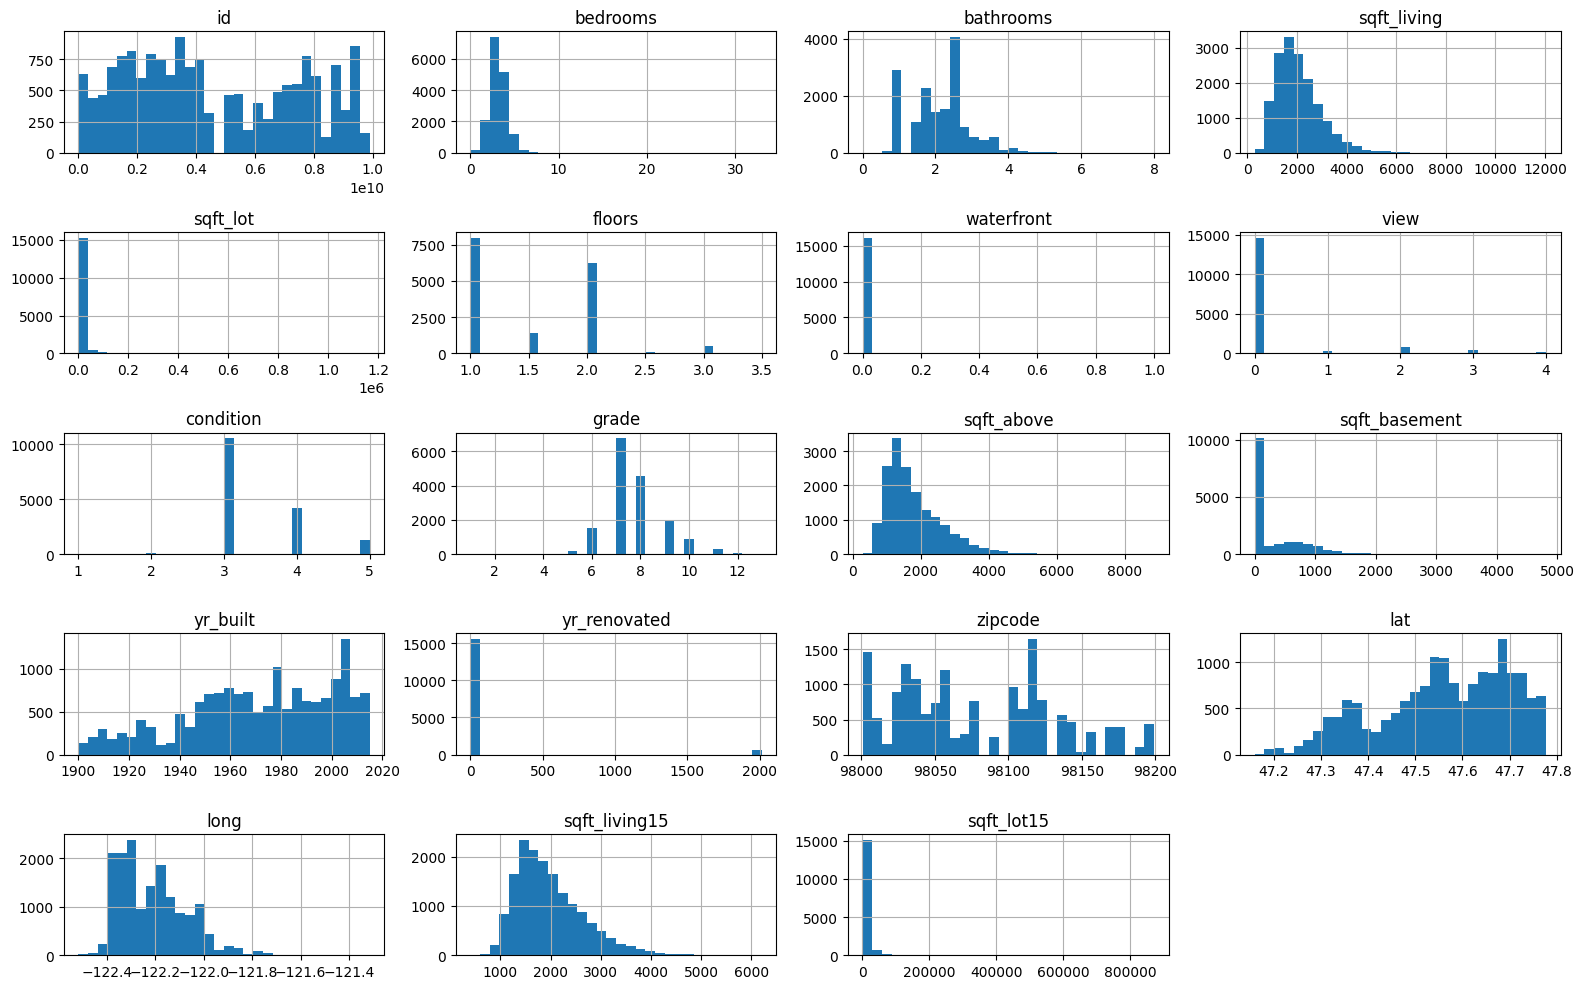

In [ ]:
train[numeric_cols].hist(figsize=(16, 10), bins=30)
plt.tight_layout()
plt.show()

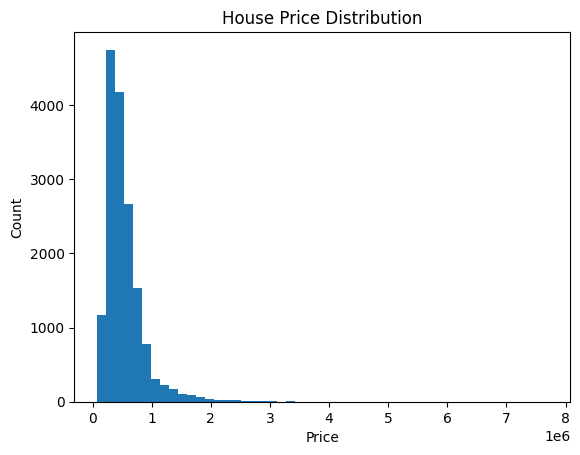

In [ ]:

plt.hist(train['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("House Price Distribution")
plt.show()


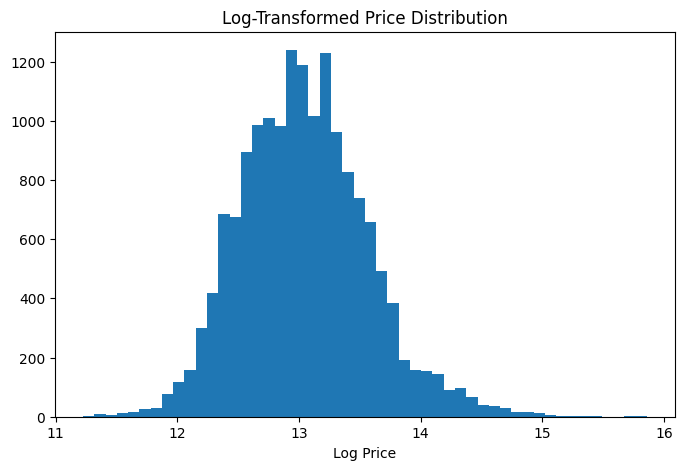

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(train['price']), bins=50)
plt.xlabel("Log Price")
plt.title("Log-Transformed Price Distribution")
plt.show()

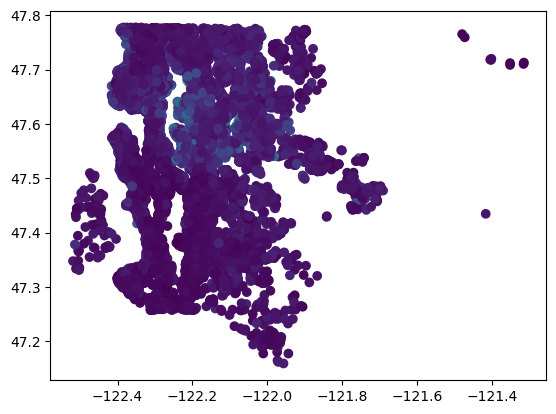

In [ ]:
plt.scatter(train["long"], train["lat"], c=train["price"])


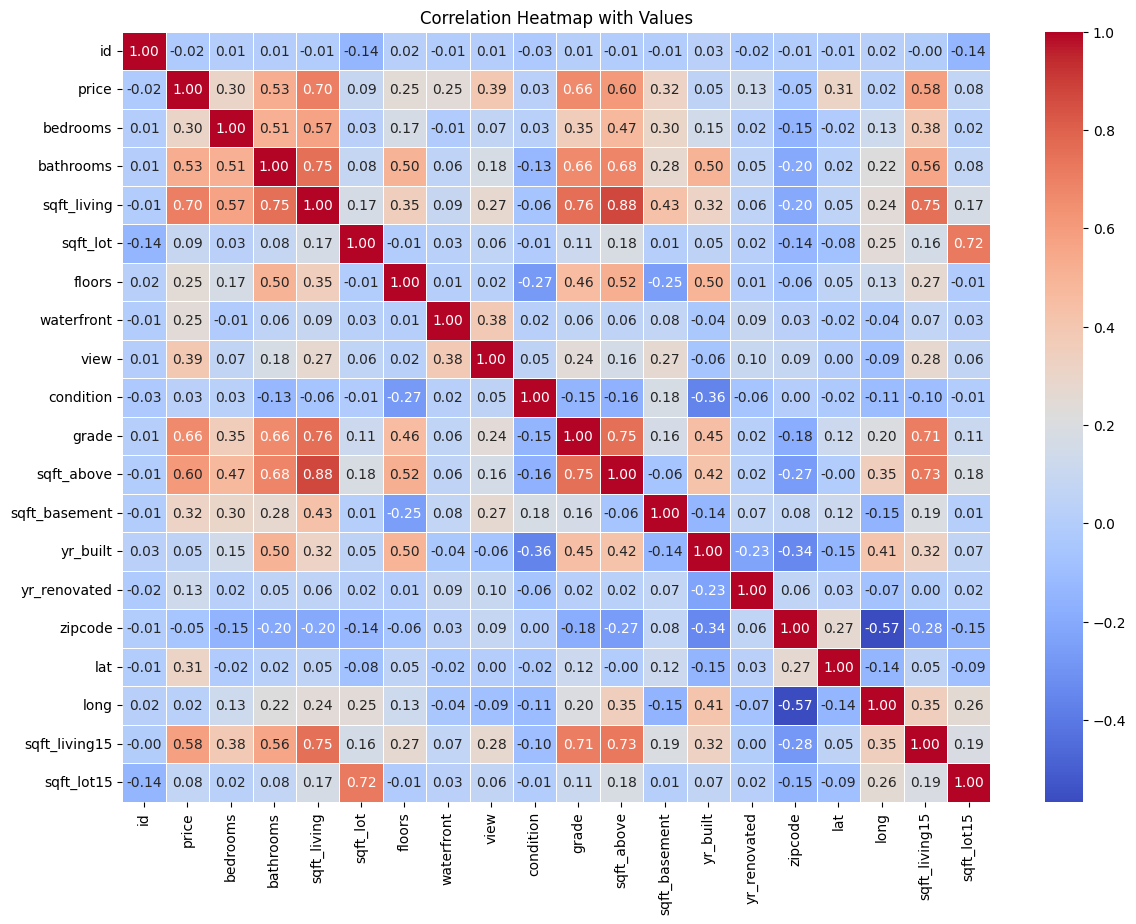

In [ ]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap with Values")
plt.show()

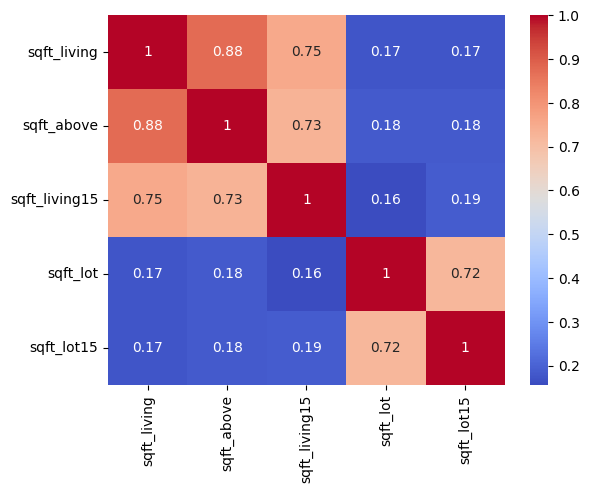

In [ ]:
corr = train[['sqft_living','sqft_above','sqft_living15', 'sqft_lot','sqft_lot15']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
pd.to_datetime(train['date'][0], format='%Y%m%dT%H%M%S').year

2015

In [ ]:
pd.to_datetime(train['date'], format='%Y%m%dT%H%M%S').dt.year.value_counts()

,count
date,
2014,10990
2015,5219


In [ ]:
random_rows = train.sample(n=5, random_state=42)  # random_state for reproducibility
print(random_rows)

               id             date   price  bedrooms  bathrooms  sqft_living  \
4226   1853200190  20141103T000000  612000         4        2.5         2670   
11070   121059147  20141104T000000  392000         4        2.5         2300   
2450    123039176  20141212T000000  399888         4        1.0         2370   
1493   1862400518  20150304T000000  385000         3        2.0         1320   
3894   3622059155  20140523T000000  235000         4        2.5         1810   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4226       5974     2.0           0     0  ...      8        2670   
11070     41167     2.0           0     0  ...      7        2300   
2450      30200     1.5           0     0  ...      7        1570   
1493       1297     3.0           0     0  ...      7        1320   
3894      39639     1.0           0     0  ...      7        1230   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4226               0      199

In [ ]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")

In [ ]:
for column in train.columns:
    if train[column].dtype != 'object':
      print(train[column].value_counts())


id
1545800290    2
4031000520    2
3523069060    2
1922059278    2
2621600015    2
             ..
7701930050    1
2723069129    1
205000050     1
2597000006    1
114100131     1
Name: count, Length: 16110, dtype: int64
price
450000    135
350000    134
425000    121
550000    113
325000    111
         ... 
283700      1
677900      1
710500      1
465500      1
366750      1
Name: count, Length: 3428, dtype: int64
bedrooms
3     7380
4     5128
2     2098
5     1213
6      197
1      142
7       26
8        9
0        8
9        5
10       2
33       1
Name: count, dtype: int64
bathrooms
2.50    4064
1.00    2891
1.75    2283
2.25    1532
2.00    1424
1.50    1094
2.75     913
3.00     547
3.50     544
3.25     441
3.75     109
4.00     104
4.50      75
4.25      59
0.75      51
5.00      17
4.75      16
5.25      11
1.25       8
0.00       7
5.50       6
0.50       3
6.00       3
5.75       2
6.25       1
7.75       1
8.00       1
6.75       1
6.50       1
Name: count, dtype: int64


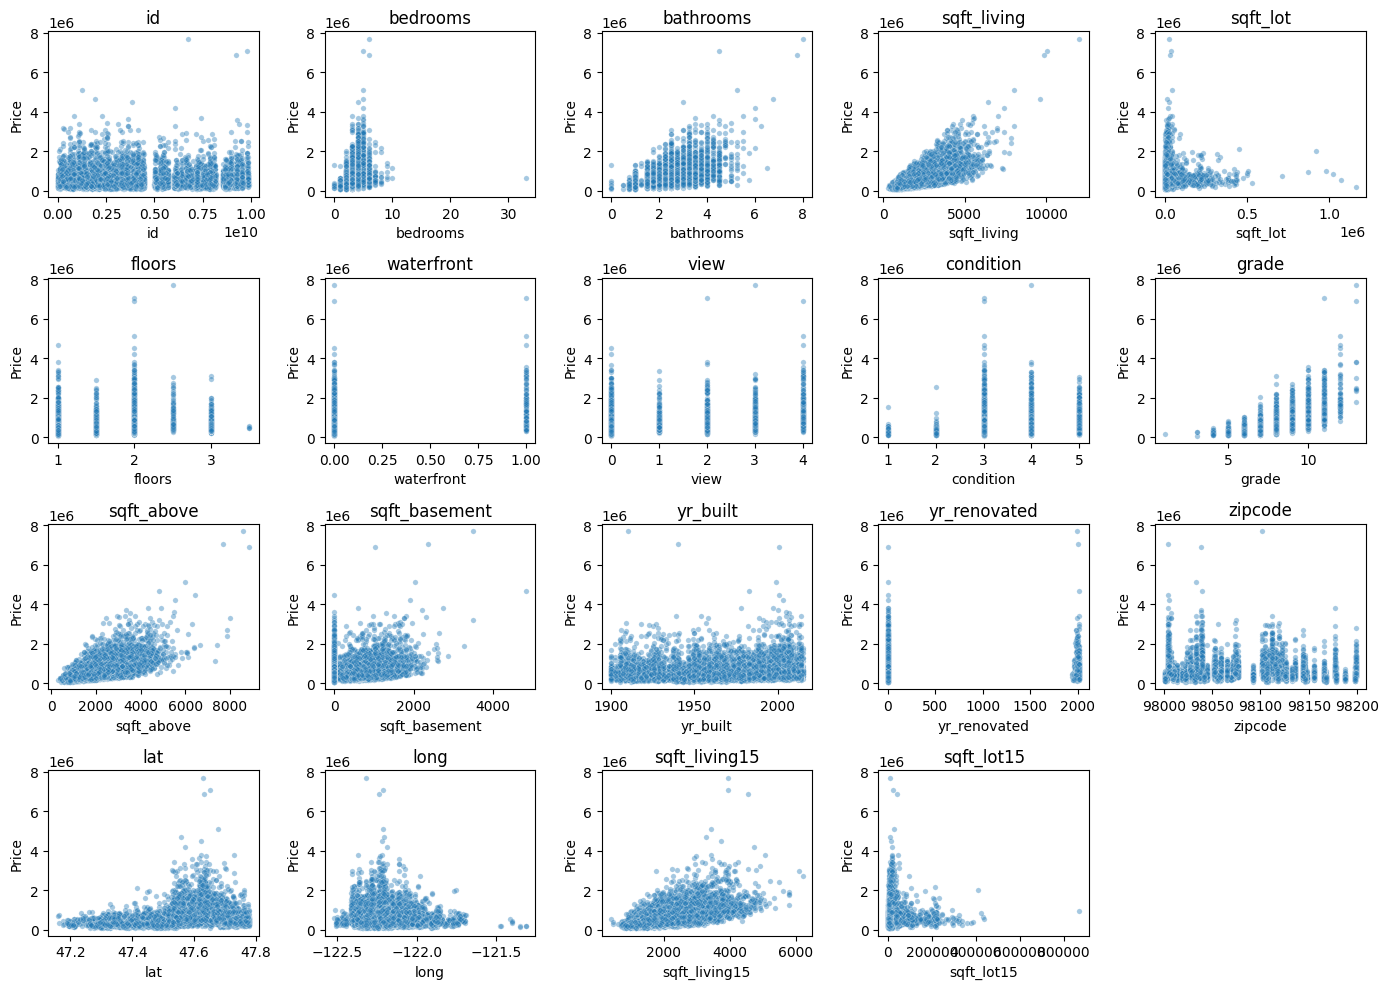

In [ ]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.scatterplot(
        x=train[col],
        y=train["price"],
        alpha=0.4,
        s=15
    )
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


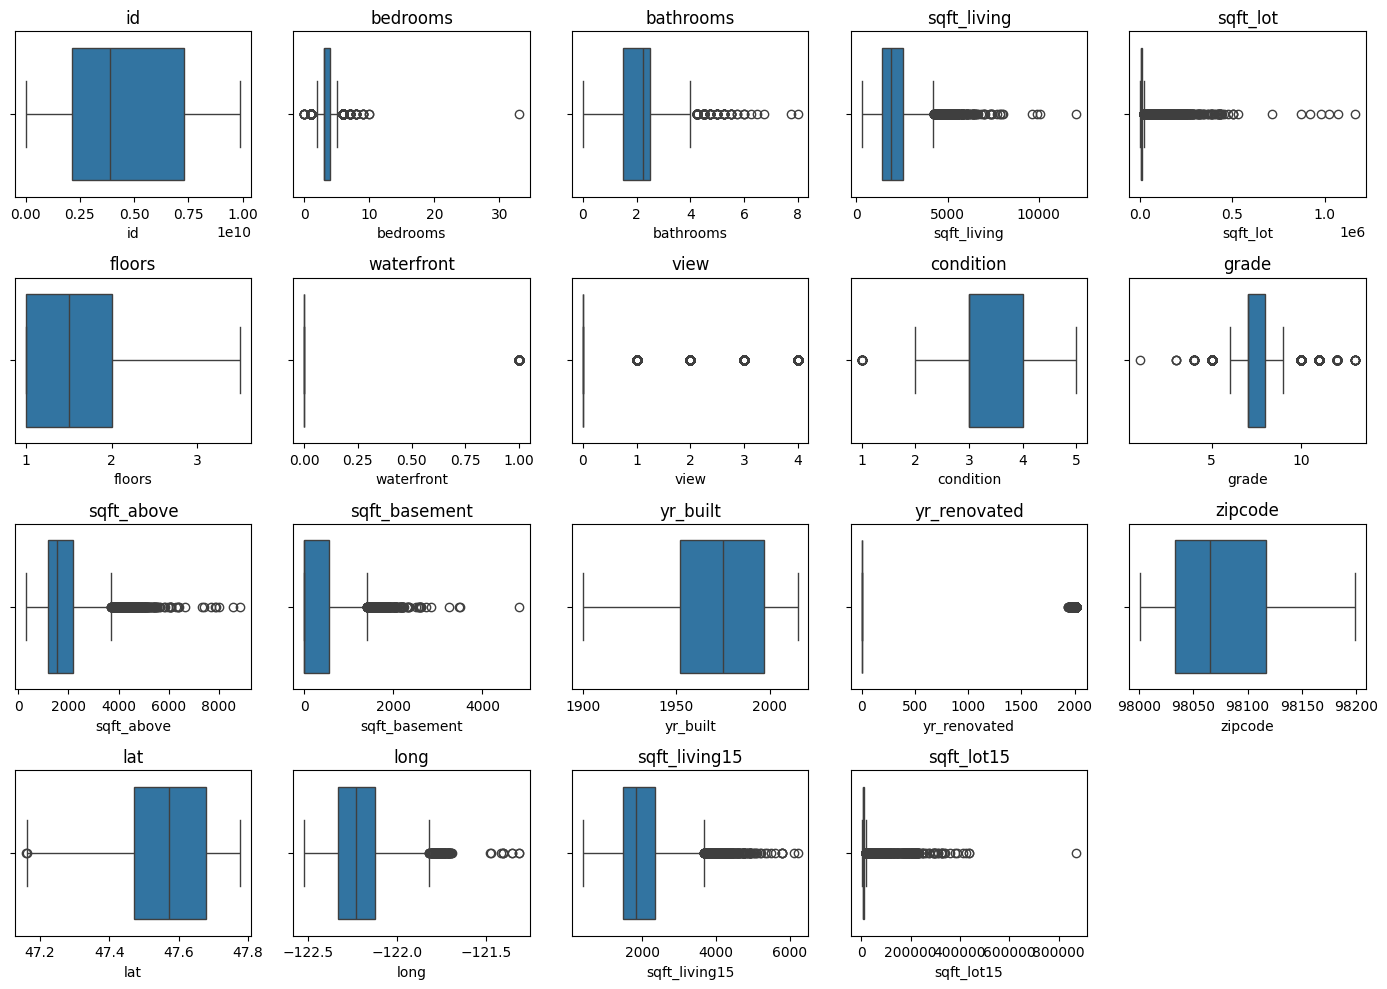

In [ ]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=train[col])
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
feature = "sqft_living"

x_thresh = train[feature].quantile(0.99)
y_thresh = train["price"].quantile(0.99)

outliers = train[
    (train[feature] > x_thresh) &
    (train["price"] > y_thresh)
][["id", feature, "price"]]

outliers

,id,sqft_living,price
625,1118002000,6390,2466350
731,3623500205,5030,2450000
1043,2397101606,5540,2630000
1096,8964800330,5090,3000000
1207,2303900100,5510,3800000
1359,4139420190,5310,2480000
1499,9808700762,10040,7062500
1680,6447300365,5190,2900000
1779,6072800246,8020,3300000
2027,2311400056,5230,1987500


In [ ]:
train.loc[train["price"] > 5e6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1499,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2115,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4962,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9264,1247600105,20141020T000000,5110800,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788


In [ ]:
train.loc[train["price"] > 5e6, ["id", "price"]]


,id,price
1499,9808700762,7062500
2115,9208900037,6885000
4962,6762700020,7700000
9264,1247600105,5110800


In [ ]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")
numeric_cols

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
filtered = train.loc[
    (train["price"] > 4e6) &
    (
        (train["bedrooms"] > 10) |
        (train["bathrooms"] > 6) |
        (train["sqft_living"] > 8000) |
        (train["sqft_lot"] > 0.6e6) |
        (train["grade"] >= 4) |
        (train["condition"] >= 4) |
        (train["sqft_above"] >= 7000) |
        (train["sqft_basement"] >= 3000) |
        (train["sqft_living15"] >= 6000)
    )
]
filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1499,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2115,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4962,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9073,3835500195,20140618T000000,4489000,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
9264,1247600105,20141020T000000,5110800,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
10412,1924059029,20140617T000000,4668000,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
11410,6065300370,20150506T000000,4208000,5,6.00,7440,21540,2.0,0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329


In [ ]:
filtered = train.loc[ (train["price"] > 1.5e6) & (train["condition"].isin([1, 2]))]
filtered
            # (train["sqft_above"] >= 7000) |
            # (train["sqft_basement"] >= 3000) |
            # (train["sqft_living15"] >= 6000) |
            # (train["sqft_lot15"] >= 0.4e6)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4654,6613000935,20140513T000000,2555000,4,2.5,5300,26211,2.0,1,2,...,10,4570,730,1923,0,98105,47.661,-122.269,3890,19281


In [ ]:
filtered = train.loc[(train["price"] >.4e6) & (train["sqft_lot15"] >= 0.4e6)]
filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1928,1550000463,20140826T000000,637000,4,3.50,3080,118918,2.0,0,0,...,9,3080,0,2008,0,98019,47.7721,-121.924,1830,434728
5289,3226079059,20141019T000000,549950,3,1.75,2930,266587,2.0,0,0,...,8,2440,490,1995,0,98014,47.6991,-121.947,2700,438213
10865,2624089007,20150320T000000,1998000,2,2.50,3900,920423,2.0,0,0,...,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
13213,225079036,20150107T000000,937500,4,4.00,5545,871200,2.0,0,0,...,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
14344,1020069042,20141001T000000,858000,4,3.50,4370,422967,1.0,0,2,...,10,2580,1790,1978,0,98022,47.2332,-122.029,3260,422967


In [ ]:
filtered = train.loc[
            (train["sqft_lot"] > 0.6e6) |
            (train["bathrooms"] > 6) |
            (train["bedrooms"] > 10) |
            (train["sqft_above"] >= 7000) |
            (train["sqft_basement"] >= 3000) |
            (train["sqft_living15"] >= 6000)
]
filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1499,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
1779,6072800246,20140702T000000,3300000,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
2115,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
2617,3303850390,20141212T000000,2983000,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
3193,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
4962,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
6212,3326079016,20150504T000000,190000,2,1.00,710,1164794,1.0,0,0,...,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730
6430,624069108,20140812T000000,3200000,4,3.25,7000,28206,1.0,1,4,...,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663
8004,7767000060,20140912T000000,1900000,5,4.25,6510,16471,2.0,0,3,...,11,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471
8056,2623069031,20140521T000000,542500,5,3.25,3010,1074218,1.5,0,0,...,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825


In [ ]:
flags = (
    (train["bedrooms"] > 10) |
    (train["bathrooms"] > 6) |
    (train["sqft_living"] > 8000)
)


train.loc[flags, ["id", "price", "sqft_living", "bedrooms", "bathrooms"]]


,id,price,sqft_living,bedrooms,bathrooms
1499,9808700762,7062500,10040,5,4.50
1779,6072800246,3300000,8020,5,6.25
2115,9208900037,6885000,9890,6,7.75
3193,2402100895,640000,1620,33,1.75
4962,6762700020,7700000,12050,6,8.00
9264,1247600105,5110800,8010,5,5.25
10412,1924059029,4668000,9640,5,6.75
13353,424069279,1180000,6260,6,6.50


#VISUAL ANALYSIS

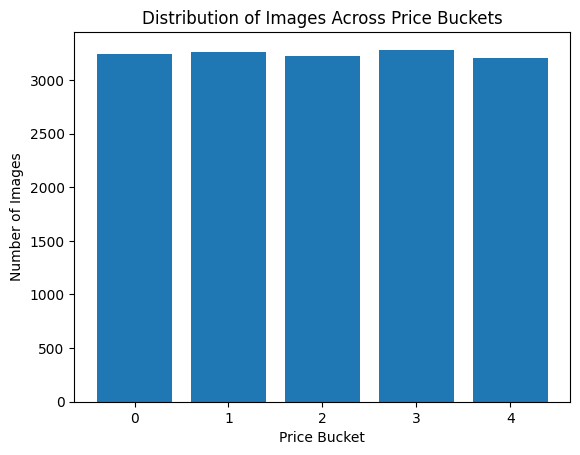

In [8]:
df = pd.read_csv("/content/drive/MyDrive/satellite_project/data/raw/train.csv")  # should include image_id, price

# Count images per price bucket
df['price_bucket'] = pd.qcut(df['price'], 5, labels=False)  # quintiles
bucket_counts = df['price_bucket'].value_counts().sort_index()

plt.bar(bucket_counts.index, bucket_counts.values)
plt.xlabel("Price Bucket")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Price Buckets")
plt.show()


In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_bucket
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,0
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,0
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,0
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,1150,90,2009,0,98027,47.5321,-122.073,1240,750,1
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,0


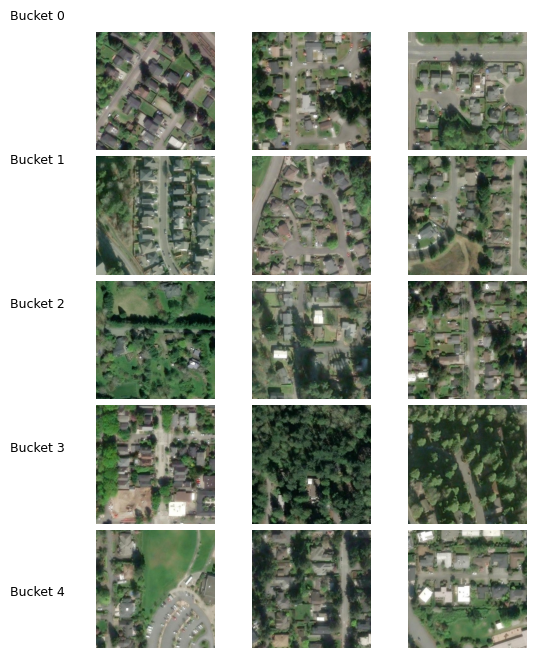

In [14]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(5, 3, figsize=(6, 8))

for i in range(5):
    sample_id = df[df['price_bucket'] == i]['id'].sample(3).values
    for j, img_id in enumerate(sample_id):
        img_path = f"/content/drive/MyDrive/satellite_project/images/raw/{img_id}.jpg"
        img = mpimg.imread(img_path)

        axs[i, j].imshow(img)
        axs[i, j].axis('off')

# Add row titles manually
for i in range(5):
    fig.text(
        0.01,                      # x position
        0.90 - i * 0.18,           # y position
        f"Bucket {i}",
        fontsize=9,
        va='center'
    )

plt.subplots_adjust(wspace=0.02, hspace=0.05)
plt.show()




#GEOSPATIAL ANALYSIS

In [ ]:
# Create geometry column
geometry = [Point(xy) for xy in zip(train['long'], train['lat'])]

gdf = gpd.GeoDataFrame(train, geometry=geometry, crs="EPSG:4326")
gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,POINT (-122.187 47.4362)
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,POINT (-122.187 47.4034)
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,POINT (-122.313 47.2704)
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,1150,90,2009,0,98027,47.5321,-122.073,1240,750,POINT (-122.073 47.5321)
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,POINT (-122.074 47.3715)


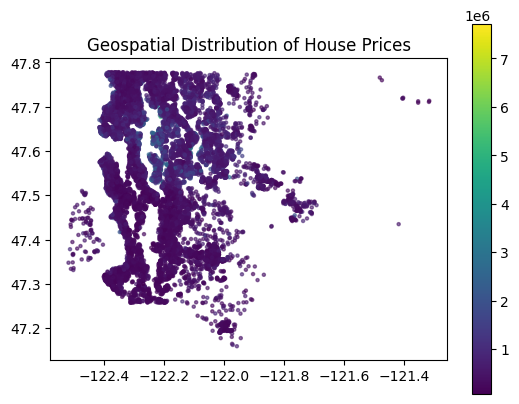

In [ ]:
gdf.plot(
    column='price',
    cmap='viridis',
    legend=True,
    markersize=5,
    alpha=0.6
)
plt.title("Geospatial Distribution of House Prices")
plt.show()


In [ ]:
gdf.groupby("waterfront")["price"].mean()


,price
waterfront,
0,5.300675e+05
1,1.591938e+06


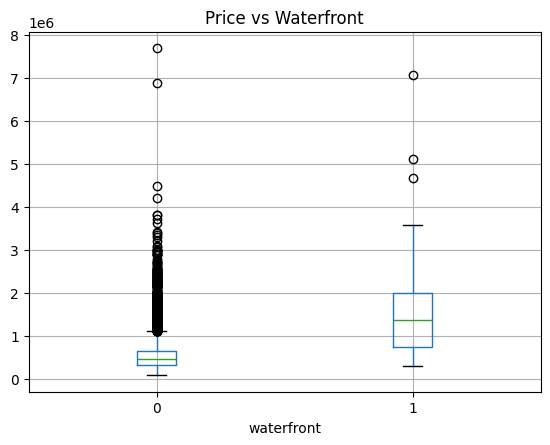

In [ ]:
gdf.boxplot(column='price', by='waterfront')
plt.title("Price vs Waterfront")
plt.suptitle("")
plt.show()

In [ ]:
# Project to meters for distance calculation
gdf_m = gdf.to_crs(epsg=3857)

radius = 1000  # 1 km
gdf_m["local_density"] = gdf_m.geometry.apply(
    lambda geom: gdf_m.geometry.distance(geom).lt(radius).sum()
)


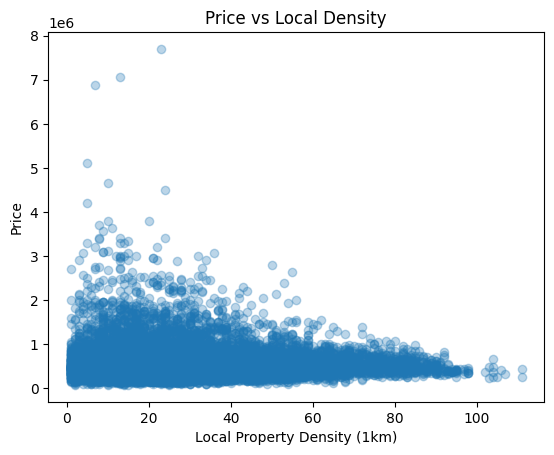

In [ ]:
plt.scatter(gdf_m["local_density"], gdf_m["price"], alpha=0.3)
plt.xlabel("Local Property Density (1km)")
plt.ylabel("Price")
plt.title("Price vs Local Density")
plt.show()


In [ ]:
def haversine(lon1, lat1, lon2, lat2):
    R = 6371
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

# Approx Seattle city center
CENTER_LAT, CENTER_LON = 47.6062, -122.3321

gdf["dist_to_center_km"] = gdf.apply(
    lambda r: haversine(r["long"], r["lat"], CENTER_LON, CENTER_LAT),
    axis=1
)


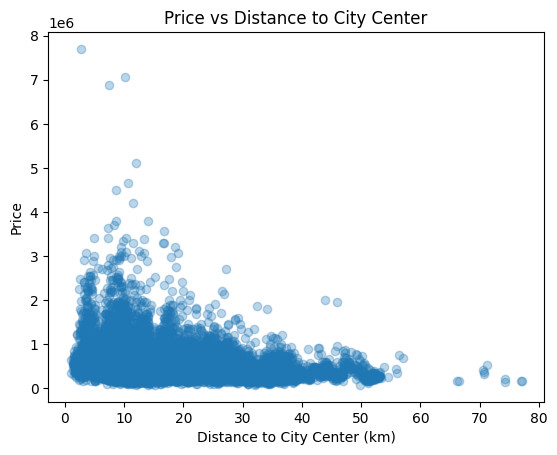

In [ ]:
plt.scatter(gdf["dist_to_center_km"], gdf["price"], alpha=0.3)
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price")
plt.title("Price vs Distance to City Center")
plt.show()


#FEATURE ENGINEERING

In [ ]:
caps = {}
# percentile capping

for col in [
    "sqft_living", "sqft_lot", "sqft_above",
    "sqft_basement", "sqft_living15", "sqft_lot15"
]:
    caps[col] = train[col].quantile(0.995)

for col, cap in caps.items():
    train[col] = train[col].clip(upper=cap)
    test[col] = test[col].clip(upper=cap)

In [ ]:
train = train[~((train["bathrooms"] == 0) & (train["bedrooms"] > 0))]

In [ ]:
train["bathrooms"] = train["bathrooms"].clip(upper=6)
test["bathrooms"] = test["bathrooms"].clip(upper=6)

In [ ]:

train["bedrooms"] = train["bedrooms"].clip(upper=10)
test["bedrooms"] = test["bedrooms"].clip(upper=10)


In [ ]:
for df in [train, test]:
    df["date"] = pd.to_datetime(
        df["date"],
        format="%Y%m%dT%H%M%S",
        errors="coerce"
    )

In [ ]:
train["date"].dtype


dtype('<M8[ns]')

In [ ]:

for df in [train, test]:
    df["sale_year"] = df["date"].dt.year
    df["sale_month"] = df["date"].dt.month


In [ ]:
for df in [train, test]:
    df["sale_year"] = df["date"].dt.year
    df["sale_month"] = df["date"].dt.month


In [ ]:
for df in [train, test]:
    df["house_age"] = df["sale_year"] - df["yr_built"]

In [ ]:
train["house_age"] = train["house_age"].clip(lower=0)
test["house_age"] = test["house_age"].clip(lower=0)

In [ ]:
#Effective age considering renovation
train['effective_age'] = train['sale_year'] - train['yr_renovated']
train['effective_age'] = train['effective_age'].where(train['yr_renovated'] != 0, train['house_age'])

test['effective_age'] = test['sale_year'] - test['yr_renovated']
test['effective_age'] = test['effective_age'].where(test['yr_renovated'] != 0, test['house_age'])

In [ ]:
for df in [train, test]:
    df["is_renovated"] = (df["yr_renovated"] > 0).astype(int)

In [ ]:
zipcode_mean = train.groupby("zipcode")["price"].mean()

train["zipcode_te"] = train["zipcode"].map(zipcode_mean)
test["zipcode_te"] = test["zipcode"].map(zipcode_mean)

# Handle unseen zipcodes in test
global_mean = train["price"].mean()
test["zipcode_te"] = test["zipcode_te"].fillna(global_mean)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16206 entries, 0 to 16208
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             16206 non-null  int64         
 1   date           16206 non-null  datetime64[ns]
 2   price          16206 non-null  int64         
 3   bedrooms       16206 non-null  int64         
 4   bathrooms      16206 non-null  float64       
 5   sqft_living    16206 non-null  float64       
 6   sqft_lot       16206 non-null  float64       
 7   floors         16206 non-null  float64       
 8   waterfront     16206 non-null  int64         
 9   view           16206 non-null  int64         
 10  condition      16206 non-null  int64         
 11  grade          16206 non-null  int64         
 12  sqft_above     16206 non-null  int64         
 13  sqft_basement  16206 non-null  int64         
 14  yr_built       16206 non-null  int64         
 15  yr_renovated   16206 non

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5404 non-null   int64         
 1   date           5404 non-null   datetime64[ns]
 2   bedrooms       5404 non-null   int64         
 3   bathrooms      5404 non-null   float64       
 4   sqft_living    5404 non-null   float64       
 5   sqft_lot       5404 non-null   float64       
 6   floors         5404 non-null   float64       
 7   waterfront     5404 non-null   int64         
 8   view           5404 non-null   int64         
 9   condition      5404 non-null   int64         
 10  grade          5404 non-null   int64         
 11  sqft_above     5404 non-null   int64         
 12  sqft_basement  5404 non-null   int64         
 13  yr_built       5404 non-null   int64         
 14  yr_renovated   5404 non-null   int64         
 15  zipcode        5404 n

#Log transformation for the columns

In [ ]:
train["price"] = np.log1p(train["price"])

In [ ]:
train["sqft_above"] = np.log1p(train["sqft_above"])
test["sqft_above"] = np.log1p(test["sqft_above"])

In [ ]:
train["sqft_basement"] = np.log1p(train["sqft_basement"])
test["sqft_basement"] = np.log1p(test["sqft_basement"])

In [ ]:
train["sqft_lot15"] = np.log1p(train["sqft_lot15"])
test["sqft_lot15"] = np.log1p(test["sqft_lot15"])

In [ ]:
train["zipcode_te"] = np.log1p(train["zipcode_te"])
test["zipcode_te"] = np.log1p(test["zipcode_te"])

In [ ]:
train.shape

(16206, 27)

In [ ]:
test.shape

(5404, 26)

In [ ]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,effective_age,is_renovated,zipcode_te
0,9117000170,2015-05-05,12.501142,4,2.25,1810.0,9240.0,2.0,0,0,...,47.4362,-122.187,1660,9.131405,2015,5,54,54,0,12.628271
1,6700390210,2014-07-08,12.409018,3,2.50,1600.0,2788.0,2.0,0,0,...,47.4034,-122.187,1720,8.190354,2014,7,22,22,0,12.621663
2,7212660540,2015-01-15,12.206078,4,2.50,1720.0,8638.0,2.0,0,0,...,47.2704,-122.313,1870,8.916774,2015,1,21,21,0,12.579669
3,8562780200,2015-04-27,12.772806,2,2.25,1240.0,705.0,2.0,0,0,...,47.5321,-122.073,1240,6.621406,2015,4,6,6,0,13.335357
4,7760400350,2014-12-05,12.354497,3,2.00,1280.0,13356.0,1.0,0,0,...,47.3715,-122.074,1590,8.996157,2014,12,20,20,0,12.657948


In [ ]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,is_renovated,zipcode_te,effective_age
0,2591820310,2014-10-06,4,2.25,2070.0,8893.0,2.0,0,0,4,...,47.4388,-122.162,2390,8.949105,2014,10,28,0,12.753140,28
1,7974200820,2014-08-21,5,3.00,2900.0,6730.0,1.0,0,0,5,...,47.6784,-122.285,2370,8.745762,2014,8,37,0,13.336040,37
2,7701450110,2014-08-15,4,2.50,3770.0,10893.0,2.0,0,2,3,...,47.5646,-122.129,3710,9.178437,2014,8,17,0,13.684213,17
3,9522300010,2015-03-31,3,3.50,4560.0,14608.0,2.0,0,2,3,...,47.6995,-122.228,4050,9.562897,2015,3,25,0,13.153954,25
4,9510861140,2014-07-14,3,2.50,2550.0,5376.0,2.0,0,0,3,...,47.6647,-122.083,2250,8.306719,2014,7,10,0,13.385821,10


#FIRST SAVING THE COLUMNS IN PREPROCESS FOLDER WITH ID TO FETCH THE IMAGE THEN REMOVING IT FOR MODEL TRAINING

In [ ]:
cols_to_drop = ['date','sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated',
                'sqft_living15', 'sale_year', 'years_since_renov','effective_age','sale_month','zipcode']

train.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
test.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [ ]:
BASE = "/content/drive/MyDrive/satellite_project"


In [ ]:
test.shape

(5404, 16)

In [ ]:
train.shape

(16206, 17)

In [ ]:
df_train = train.copy()
df_test = test.copy()

In [ ]:
df_train.to_csv(f"{BASE}/data/processed/train_processed.csv", index=False)
df_test.to_csv(f"{BASE}/data/processed/test_processed.csv", index=False)

In [ ]:
cols_to_drop = ['id']

train.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
test.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [ ]:
train.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_lot15,house_age,is_renovated,zipcode_te
0,12.501142,4,2.25,2.0,0,0,3,7,7.501634,0.00000,47.4362,-122.187,9.131405,54,0,12.628271
1,12.409018,3,2.50,2.0,0,0,4,7,7.378384,0.00000,47.4034,-122.187,8.190354,22,0,12.621663
2,12.206078,4,2.50,2.0,0,0,3,8,7.450661,0.00000,47.2704,-122.313,8.916774,21,0,12.579669
3,12.772806,2,2.25,2.0,0,0,3,7,7.048386,4.51086,47.5321,-122.073,6.621406,6,0,13.335357
4,12.354497,3,2.00,1.0,0,0,3,7,7.155396,0.00000,47.3715,-122.074,8.996157,20,0,12.657948


In [ ]:
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("price")
numeric_cols

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_lot15',
       'house_age', 'is_renovated', 'zipcode_te'],
      dtype='object')

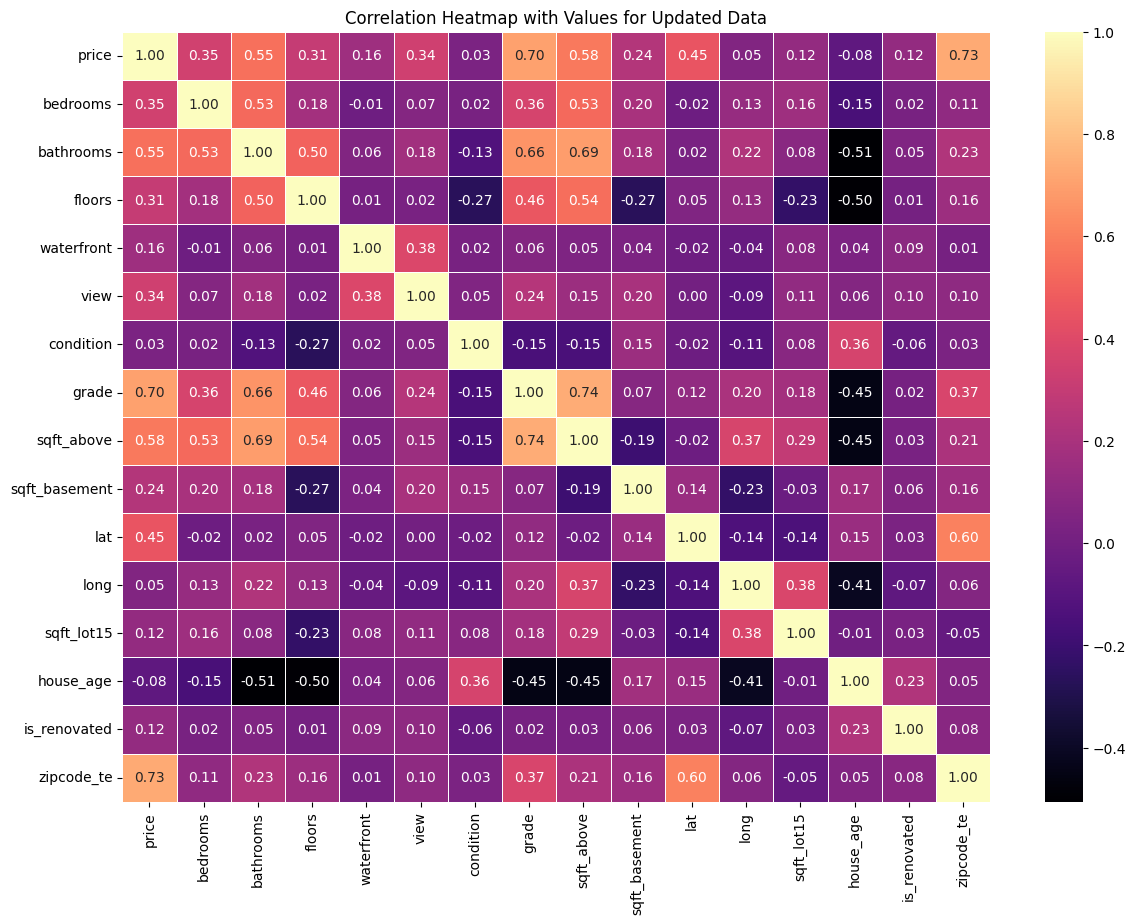

In [ ]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    linewidths=0.5
)
plt.title("Correlation Heatmap with Values for Updated Data")
plt.show()

In [ ]:
cols = ['price',
    'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
    'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_lot15',
    'house_age', 'is_renovated', 'zipcode_te'
]

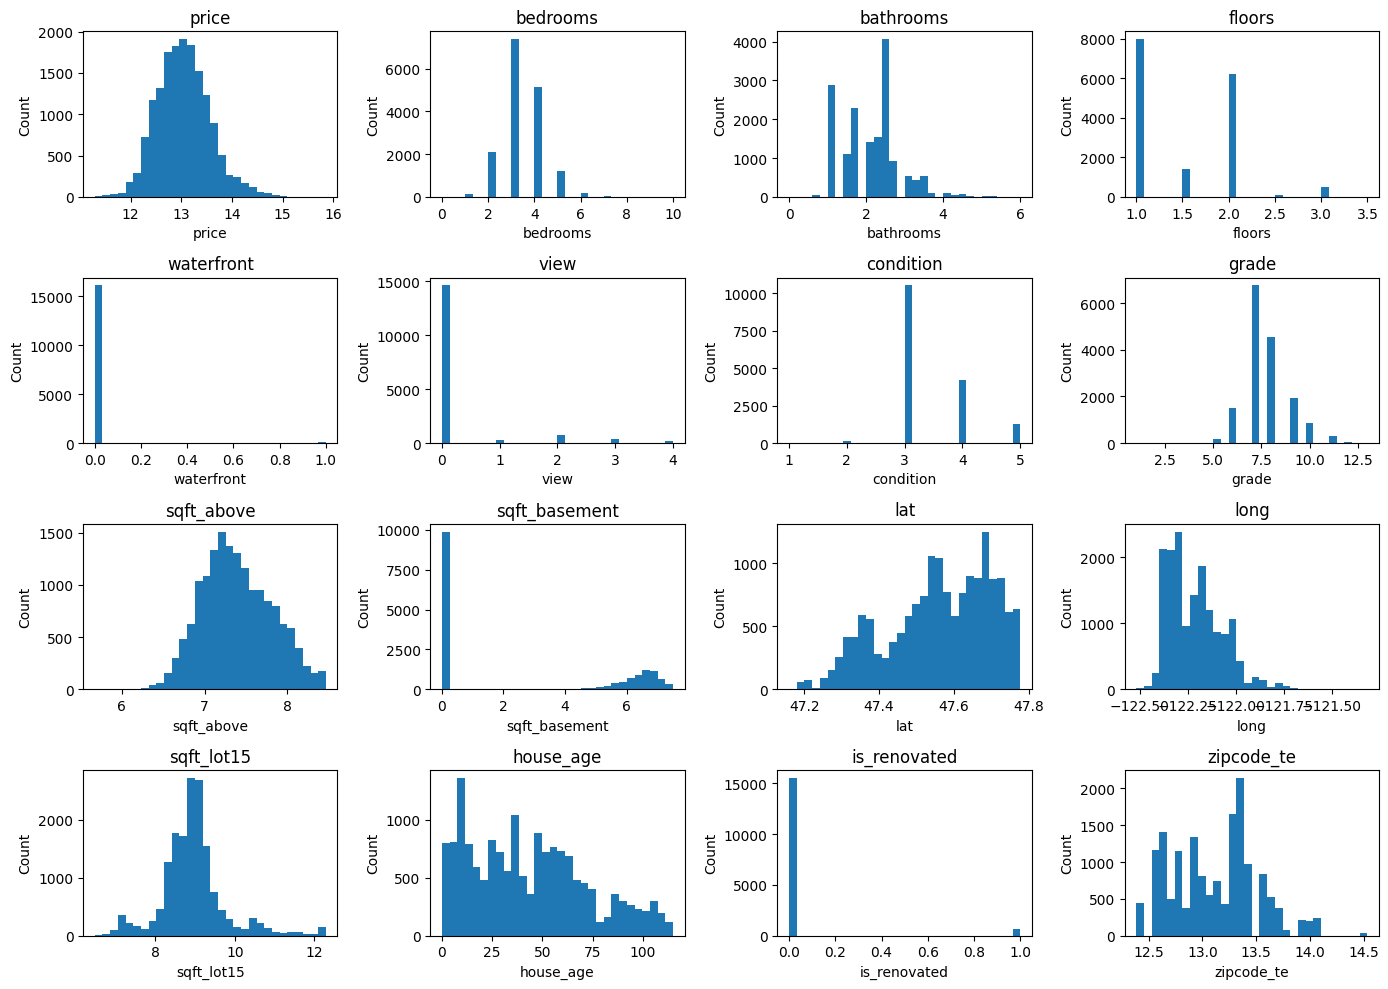

In [ ]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(train[col], bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
# for column in test.columns:
#     if test[column].dtype != 'object':
#       print(test[column].value_counts())
for column in train.columns:
    if train[column].dtype != 'object':
      print(train[column].value_counts())


price
13.017005    135
12.765691    134
12.959847    121
13.217675    113
12.691584    111
            ... 
12.812438      1
13.050870      1
13.473726      1
12.540761      1
13.495995      1
Name: count, Length: 3427, dtype: int64
bedrooms
3     7380
4     5128
2     2098
5     1213
6      197
1      139
7       26
8        9
0        8
9        5
10       3
Name: count, dtype: int64
bathrooms
2.50    4064
1.00    2891
1.75    2283
2.25    1532
2.00    1424
1.50    1094
2.75     913
3.00     547
3.50     544
3.25     441
3.75     109
4.00     104
4.50      75
4.25      59
0.75      51
5.00      17
4.75      16
5.25      11
6.00       8
1.25       8
5.50       6
0.00       4
0.50       3
5.75       2
Name: count, dtype: int64
floors
1.0    7967
2.0    6215
1.5    1414
3.0     489
2.5     117
3.5       4
Name: count, dtype: int64
waterfront
0    16093
1      113
Name: count, dtype: int64
view
0    14601
2      743
3      375
1      254
4      233
Name: count, dtype: int64
condition
3  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16206 entries, 0 to 16208
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16206 non-null  float64
 1   bedrooms       16206 non-null  int64  
 2   bathrooms      16206 non-null  float64
 3   floors         16206 non-null  float64
 4   waterfront     16206 non-null  int64  
 5   view           16206 non-null  int64  
 6   condition      16206 non-null  int64  
 7   grade          16206 non-null  int64  
 8   sqft_above     16206 non-null  float64
 9   sqft_basement  16206 non-null  float64
 10  lat            16206 non-null  float64
 11  long           16206 non-null  float64
 12  sqft_lot15     16206 non-null  float64
 13  house_age      16206 non-null  int64  
 14  is_renovated   16206 non-null  int64  
 15  zipcode_te     16206 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 2.1 MB


#MODEL TRAINING

In [ ]:
# Binary features (no scaling)
binary_features = [
    "waterfront",
    "is_renovated"
]
# Ordinal / discrete numeric
ordinal_features = [
    "bedrooms",
    "bathrooms",
    "floors",
    "view",
    "condition",
    "grade",
    "house_age"
]
# Continuous + skewed numeric
continuous_features = [
    "sqft_above",
    "sqft_basement",
    "sqft_lot15",
    "zipcode_te",
    "lat",
    "long"
]


In [ ]:
X = train[continuous_features + ordinal_features + binary_features]
y = train["price"]

In [ ]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("continuous", StandardScaler(), continuous_features),
        ("ordinal", StandardScaler(), ordinal_features),
        ("binary", "passthrough", binary_features)
    ]
)


In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)


In [ ]:
#  Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  StandardScaler(),
                                                  ['sqft_above',
                                                   'sqft_basement',
                                                   'sqft_lot15', 'zipcode_te',
                                                   'lat', 'long']),
                                                 ('ordinal', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'view',
                                                   'condition', 'grade',
                                                   'house_age']),
                                                 ('binary', 'passthrough',
                                                  ['waterfront',
                                                   'is_renovated'])])),
                ('regressor', LinearRegression())])

In [ ]:
#  Make predictions on test set
y_pred = model.predict(X_test)

In [ ]:

#  Evaluate (example: R^2 score)
from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y_test, y_pred))

R^2 score: 0.8531446596827541


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.03839865128992422
Root Mean Squared Error (RMSE): 0.1959557380887945


In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape, "%")


MAPE: 1.1280382957597461 %


In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}:  R² = {r2:.4f},  RMSE = {rmse:.4f}")


Decision Tree:  R² = 0.7623,  RMSE = 0.2493
Random Forest:  R² = 0.8780,  RMSE = 0.1786
Gradient Boosting:  R² = 0.8781,  RMSE = 0.1785
Linear Regression:  R² = 0.8531,  RMSE = 0.1960
Ridge:  R² = 0.8531,  RMSE = 0.1960
Lasso:  R² = 0.0007,  RMSE = 0.5112


#Neural network simple only tabular

In [ ]:
train.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_lot15,house_age,is_renovated,zipcode_te
0,12.501142,4,2.25,2.0,0,0,3,7,7.501634,0.00000,47.4362,-122.187,9.131405,54,0,12.628271
1,12.409018,3,2.50,2.0,0,0,4,7,7.378384,0.00000,47.4034,-122.187,8.190354,22,0,12.621663
2,12.206078,4,2.50,2.0,0,0,3,8,7.450661,0.00000,47.2704,-122.313,8.916774,21,0,12.579669
3,12.772806,2,2.25,2.0,0,0,3,7,7.048386,4.51086,47.5321,-122.073,6.621406,6,0,13.335357
4,12.354497,3,2.00,1.0,0,0,3,7,7.155396,0.00000,47.3715,-122.074,8.996157,20,0,12.657948


In [ ]:
X = train.drop(columns=["price"])   # DO NOT include price
y = np.log1p(train["price"])        # log target

X_test = test.copy()


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
model = Sequential([
    tf.keras.Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.2),

    Dense(1)  # regression output
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)


In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=10,
            restore_best_weights=True
        )
    ],
    verbose=1
)


Epoch 1/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.0163 - mae: 1.0925 - val_loss: 0.0741 - val_mae: 0.2241
Epoch 2/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2843 - mae: 0.4256 - val_loss: 0.0392 - val_mae: 0.1548
Epoch 3/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1880 - mae: 0.3466 - val_loss: 0.0336 - val_mae: 0.1679
Epoch 4/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1391 - mae: 0.2972 - val_loss: 0.0226 - val_mae: 0.1389
Epoch 5/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1076 - mae: 0.2597 - val_loss: 0.0085 - val_mae: 0.0835
Epoch 6/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0881 - mae: 0.2353 - val_loss: 0.0027 - val_mae: 0.0439
Epoch 7/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0688 - mae: 0.2089 - val_loss: 0.0049 - val_mae: 0.0657
Epoch 8/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0607 - mae: 0.1957 - val_loss: 0.0021 - val_mae: 0.0395
Epoch 9/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [ ]:
from sklearn.metrics import r2_score

y_val_pred_log = model.predict(X_val_scaled).ravel()
y_val_pred = np.expm1(y_val_pred_log)
y_val_true = np.expm1(y_val)

print("R² Score:", r2_score(y_val_true, y_val_pred))


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R² Score: 0.8624437817712942


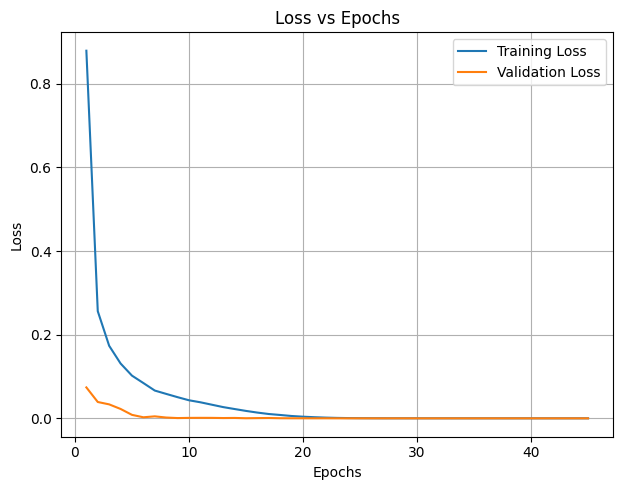

In [ ]:
# Extract training & validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs
epochs = range(1, len(train_loss)+1)

# Plot Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
